In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris as iris
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

Wczytanie danych z pliku .csv oraz przygotowanie ich do analizy.

In [75]:
data = pd.read_csv("animals.csv")
data = data.rename(columns={data.columns[0]: 'animal'})
data = data.fillna(0)
data = data.set_index('animal')
data

,war,fly,ver,end,gro,hai
animal,,,,,,
ant,1,1,1,1.0,2.0,1
bee,1,2,1,1.0,2.0,2
cat,2,1,2,1.0,1.0,2
cpl,1,1,1,1.0,1.0,2
chi,2,1,2,2.0,2.0,2
cow,2,1,2,1.0,2.0,2
duc,2,2,2,1.0,2.0,1
eag,2,2,2,2.0,1.0,1
ele,2,1,2,2.0,2.0,1


Wykreślenie heatmapy z klastrowaniem.

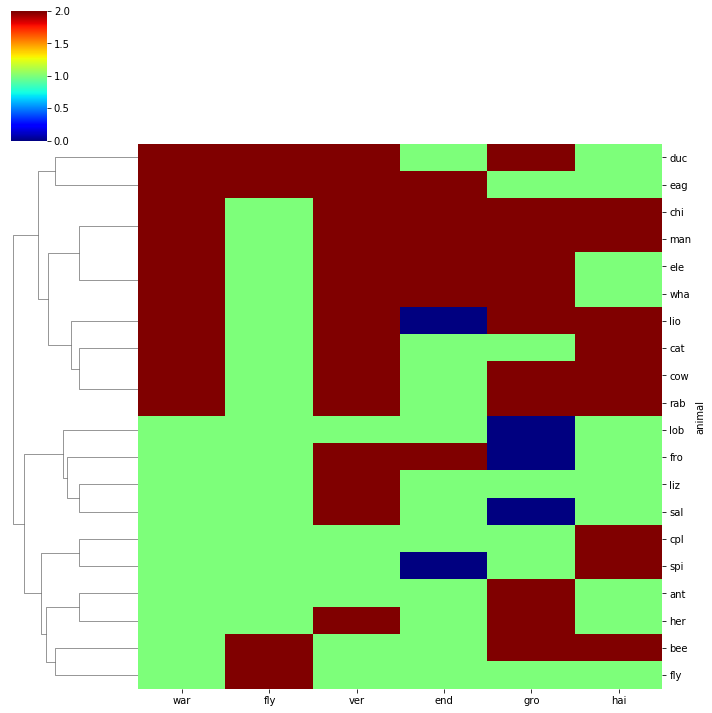

In [76]:
sns.clustermap(data, cmap = "jet", col_cluster = False)
plt.show()

Z drzewa narysowanego po lewej stronie wykresu wynika, że analizowane zwierzęta można podzielić na 4 grupy: 
1. Stałocieplne kręgowce latające
2. Stałocieplne kręgowce nielatające
3. Zmiennocieplne kręgowce
4. Zmiennocieplne bezkręgowce

Część 2 - Algorytm K-means

Wczytanie danych ze zbioru iris

In [77]:
ir = iris()
data_ir = pd.DataFrame(data= np.c_[ir['data'], ir['target']],
                     columns= ir['feature_names'] + ['target'])
data_ir

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Wyznaczenie skuteczności rozpoznawania skupień w zależności od kombinacji użytych zmiennych wyjaśniających.

In [78]:
#inicjalizacja tablic docelowo ze skutecznościami, najlepszą kombinacją zmiennych oraz wszystkimi kombinacjami
accuracy = np.empty(0)
features = np.empty(0)
explanatory = np.empty(0)
columns_num = np.arange(0,len(data_ir.columns)-1)
for i in range(2,len(columns_num)+1):
    #wyznaczenie wszystkich kombinacji i zmiennych
    combine = combinations(columns_num,r=i)
    for c in combine:
        #tworzenie klasyfikatora na podstawie kolejnych kombinacji zmiennych
        x = data_ir.iloc[:,list(c)]
        classifier = KMeans(n_clusters=3, random_state = 0)
        fitted = classifier.fit(x)
        #zapisanie skuteczności klasyfikatora
        accuracy = np.append(accuracy, accuracy_score(fitted.labels_,data_ir.iloc[:,-1]))
        if accuracy[len(accuracy)-1]==max(accuracy):
            #zapisanie nazw zmiennych wyjaśniających dla najskuteczniejszego klasyfikatora
            features = np.empty(0)
            features = np.append(features,list(x.columns))
        #zapisanie kombinacji jako ciągów znaków
        explanatory = np.append(explanatory, ' '.join(list(x.columns)))

Wykreślenie zależności skuteczności rozpoznawania skupień od użytych zmiennych wyjaśniających.
Największą wartość skuteczności zaznaczono na pomarańczowo.

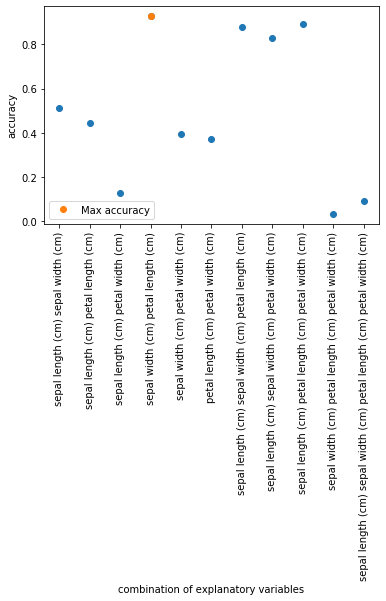

In [79]:
fig, ax = plt.subplots( 1, 1)
plt.xticks(rotation=90)
ax.plot(explanatory,accuracy, 'o')
ax.plot(explanatory[np.argmax(accuracy)],max(accuracy), 'o', label = 'Max accuracy')
ax.set_xlabel('combination of explanatory variables')
ax.set_ylabel('accuracy')
ax.legend()

Jak widać na powyższym wykresie, najlepszą skuteczność wykazuje klasyfikator zbudowany na zmiennych sepal width i petal length. Poniżej porównano prawdziwe klasy danych z przypisanymi prez klasyfikator k-means.  

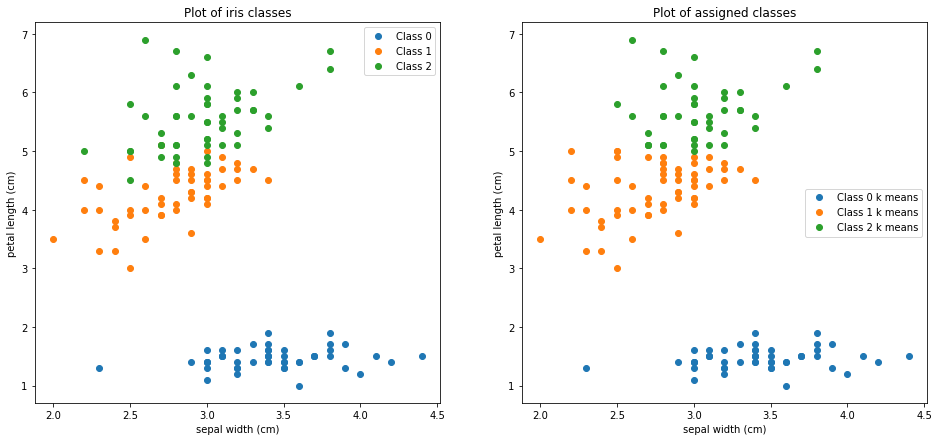

In [80]:
best = data_ir[features]
classifier = KMeans(n_clusters = 3, random_state = 0)
fitted = classifier.fit(best)
fitted_lab = pd.DataFrame(fitted.labels_)
fitted_lab = fitted_lab.rename(columns={fitted_lab.columns[0]: 'label'})

#podział na klasy w danych pierwotnych
class_0 = data_ir.loc[data_ir['target'] == 0]
class_1 = data_ir.loc[data_ir['target'] == 1]
class_2 = data_ir.loc[data_ir['target'] == 2]
#podział na klasy w danych sklasyfikowanych
classified_data = data_ir.join(fitted_lab)
class_0_fitted = classified_data.loc[classified_data['label'] == 0]
class_1_fitted = classified_data.loc[classified_data['label'] == 1]
class_2_fitted = classified_data.loc[classified_data['label'] == 2]

fig, axs = plt.subplots( 1, 2, figsize = [16, 7])
axs[0].plot(class_0[features[0]],class_0[features[1]], 'o', label = 'Class 0')
axs[0].plot(class_1[features[0]],class_1[features[1]], 'o', label = 'Class 1')
axs[0].plot(class_2[features[0]],class_2[features[1]], 'o', label = 'Class 2')
axs[1].plot(class_0_fitted[features[0]],class_0_fitted[features[1]], 'o', label = 'Class 0 k means')
axs[1].plot(class_1_fitted[features[0]],class_1_fitted[features[1]], 'o', label = 'Class 1 k means')
axs[1].plot(class_2_fitted[features[0]],class_2_fitted[features[1]], 'o', label = 'Class 2 k means')
axs[0].set_title('Plot of iris classes')
axs[1].set_title('Plot of assigned classes')
axs[0].set_xlabel(features[0])
axs[1].set_xlabel(features[0])
axs[0].set_ylabel(features[1])
axs[1].set_ylabel(features[1])
axs[0].legend()
axs[1].legend()

Jak widać na wykresach, rozpoznawalność skupień rzeczywiście jest wysoka. Jedynie kilka pojedynczych rekordów na granicy skupień 1 i 2 zostało źle sklasyfikowanych.